In [1]:
!pip install pyyaml==5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-v2ko_qpn
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-v2ko_qpn
  Resolved https://github.com/facebookresearch/detectron2.git to commit 400a49c1ec11a18dd25aea3910507bc3bcd15794
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311

In [3]:
# Install detectron2 if not installed
# !pip install detectron2 -q

import torch
import cv2
import random
import numpy as np
import os
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances


In [ ]:
# !curl -L "https://app.roboflow.com/ds/ycdAFVcK7c?key=gxp8vd13hH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zipy
# !curl -L "https://app.roboflow.com/ds/ycdAFVcK7c?key=gxp8vd13hH" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
# !curl -L "https://app.roboflow.com/ds/3wvzxiOm9M?key=vMYCdLDYEL" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L "https://app.roboflow.com/ds/ZjGGV6XHSW?key=4XhcF4ZhCE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
#!curl -L "https://app.roboflow.com/ds/Bm5HgWFNSs?key=2BBKNGY8Eb" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip       ============ large_spillage dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   913  100   913    0     0   3359      0 --:--:-- --:--:-- --:--:--  3356
100 1955k  100 1955k    0     0  1759k      0  0:00:01  0:00:01 --:--:-- 1759k
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/20250327172107896-7-_jpg.rf.25fd9ae6b82775707ee0ca7852d338e2.jpg  
 extracting: test/20250327180047351-9-_jpg.rf.bfd76e0f9df04a3129f1e24e8a2029d3.jpg  
  inflating: test/_annotations.coco.json  
   creating: train/
 extracting: train/20250326034718884-10-_jpg.rf.5125564d6c1ef9f67206ebe0bee53071.jpg  
 extracting: train/20250326034718884-12-_jpg.rf.cc140e152b0d66248e81600ff5da06e7.jpg  
 extracting: train/20250326034718884-13-_jpg.rf.699823b32ea268f6ea5c686daa94a537.jpg  
 extracting: train/20250326034718884-14-_jpg.rf.e03479ca2fc38fa8e640bbaf

In [5]:
# Path to your dataset
train_json = "/content/train/_annotations.coco.json"
val_json = "/content/valid/_annotations.coco.json"
test_json = "/content/test/_annotations.coco.json"  # If you have a separate test dataset

# Register train, val, and test datasets in Detectron2
register_coco_instances("my_dataset_train", {}, train_json, "/content/train")
register_coco_instances("my_dataset_val", {}, val_json, "/content/valid")
register_coco_instances("my_dataset_test", {}, test_json, "/content/test")  # Register test dataset


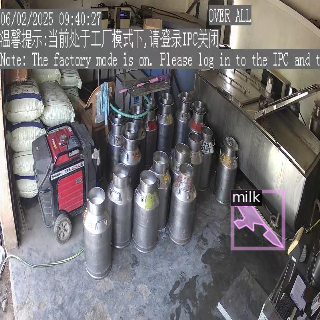

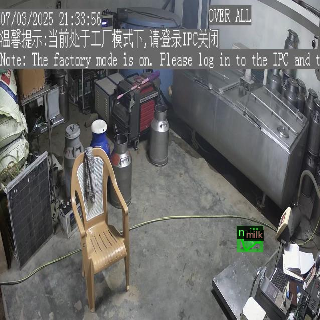

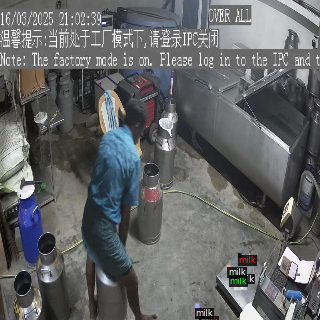

In [6]:
# Load dataset metadata
from google.colab.patches import cv2_imshow
metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

# Visualize a few random samples
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)

    cv2_imshow( vis.get_image()[:, :, ::-1])
    # cv2.waitKey(0)

# cv2.destroyAllWindows()


In [8]:
# cfg = get_cfg()
from detectron2.model_zoo import get_config_file
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.MODEL.DEVICE = "cuda"  # Ensure Detectron2 runs on CPU


cfg.merge_from_file(get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # Pretrained Model
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 500 # Change based on your dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # Number of classes
cfg.OUTPUT_DIR = "./output"

# Create output directory
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [10]:
len(metadata.thing_classes)

1

In [11]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[04/16 12:44:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/16 12:44:19 d2.engine.train_loop]: Starting training from iteration 0
[04/16 12:44:26 d2.utils.events]:  eta: 0:02:35  iter: 19  total_loss: 1.95  loss_cls: 0.5846  loss_box_reg: 0.005701  loss_mask: 0.6933  loss_rpn_cls: 0.527  loss_rpn_loc: 0.1476    time: 0.3255  last_time: 0.3411  data_time: 0.0276  last_data_time: 0.0239   lr: 3.8962e-05  max_mem: 2732M
[04/16 12:44:32 d2.utils.events]:  eta: 0:02:29  iter: 39  total_loss: 1.291  loss_cls: 0.2582  loss_box_reg: 0.03016  loss_mask: 0.684  loss_rpn_cls: 0.1963  loss_rpn_loc: 0.1503    time: 0.3242  last_time: 0.3614  data_time: 0.0083  last_data_time: 0.0051   lr: 7.8922e-05  max_mem: 2734M
[04/16 12:44:39 d2.utils.events]:  eta: 0:02:23  iter: 59  total_loss: 1.066  loss_cls: 0.1113  loss_box_reg: 0.04624  loss_mask: 0.664  loss_rpn_cls: 0.1433  loss_rpn_loc: 0.1234    time: 0.3273  last_time: 0.3955  data_time: 0.0080  last_data_time: 0.0183   lr: 0.00011888  max_mem: 2734M
[04/16 12:44:46 d2.utils.events]:  eta: 0:02:18  iter

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


[04/16 12:58:47 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...
Instances(num_instances=2, image_height=1296, image_width=2304, fields=[pred_boxes: Boxes(tensor([[1776.4747, 1143.3784, 1824.6924, 1209.0292],
        [1444.0323,  713.9510, 1793.9384,  861.0355]], device='cuda:0')), scores: tensor([0.6744, 0.5947], device='cuda:0'), pred_classes: tensor([0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],

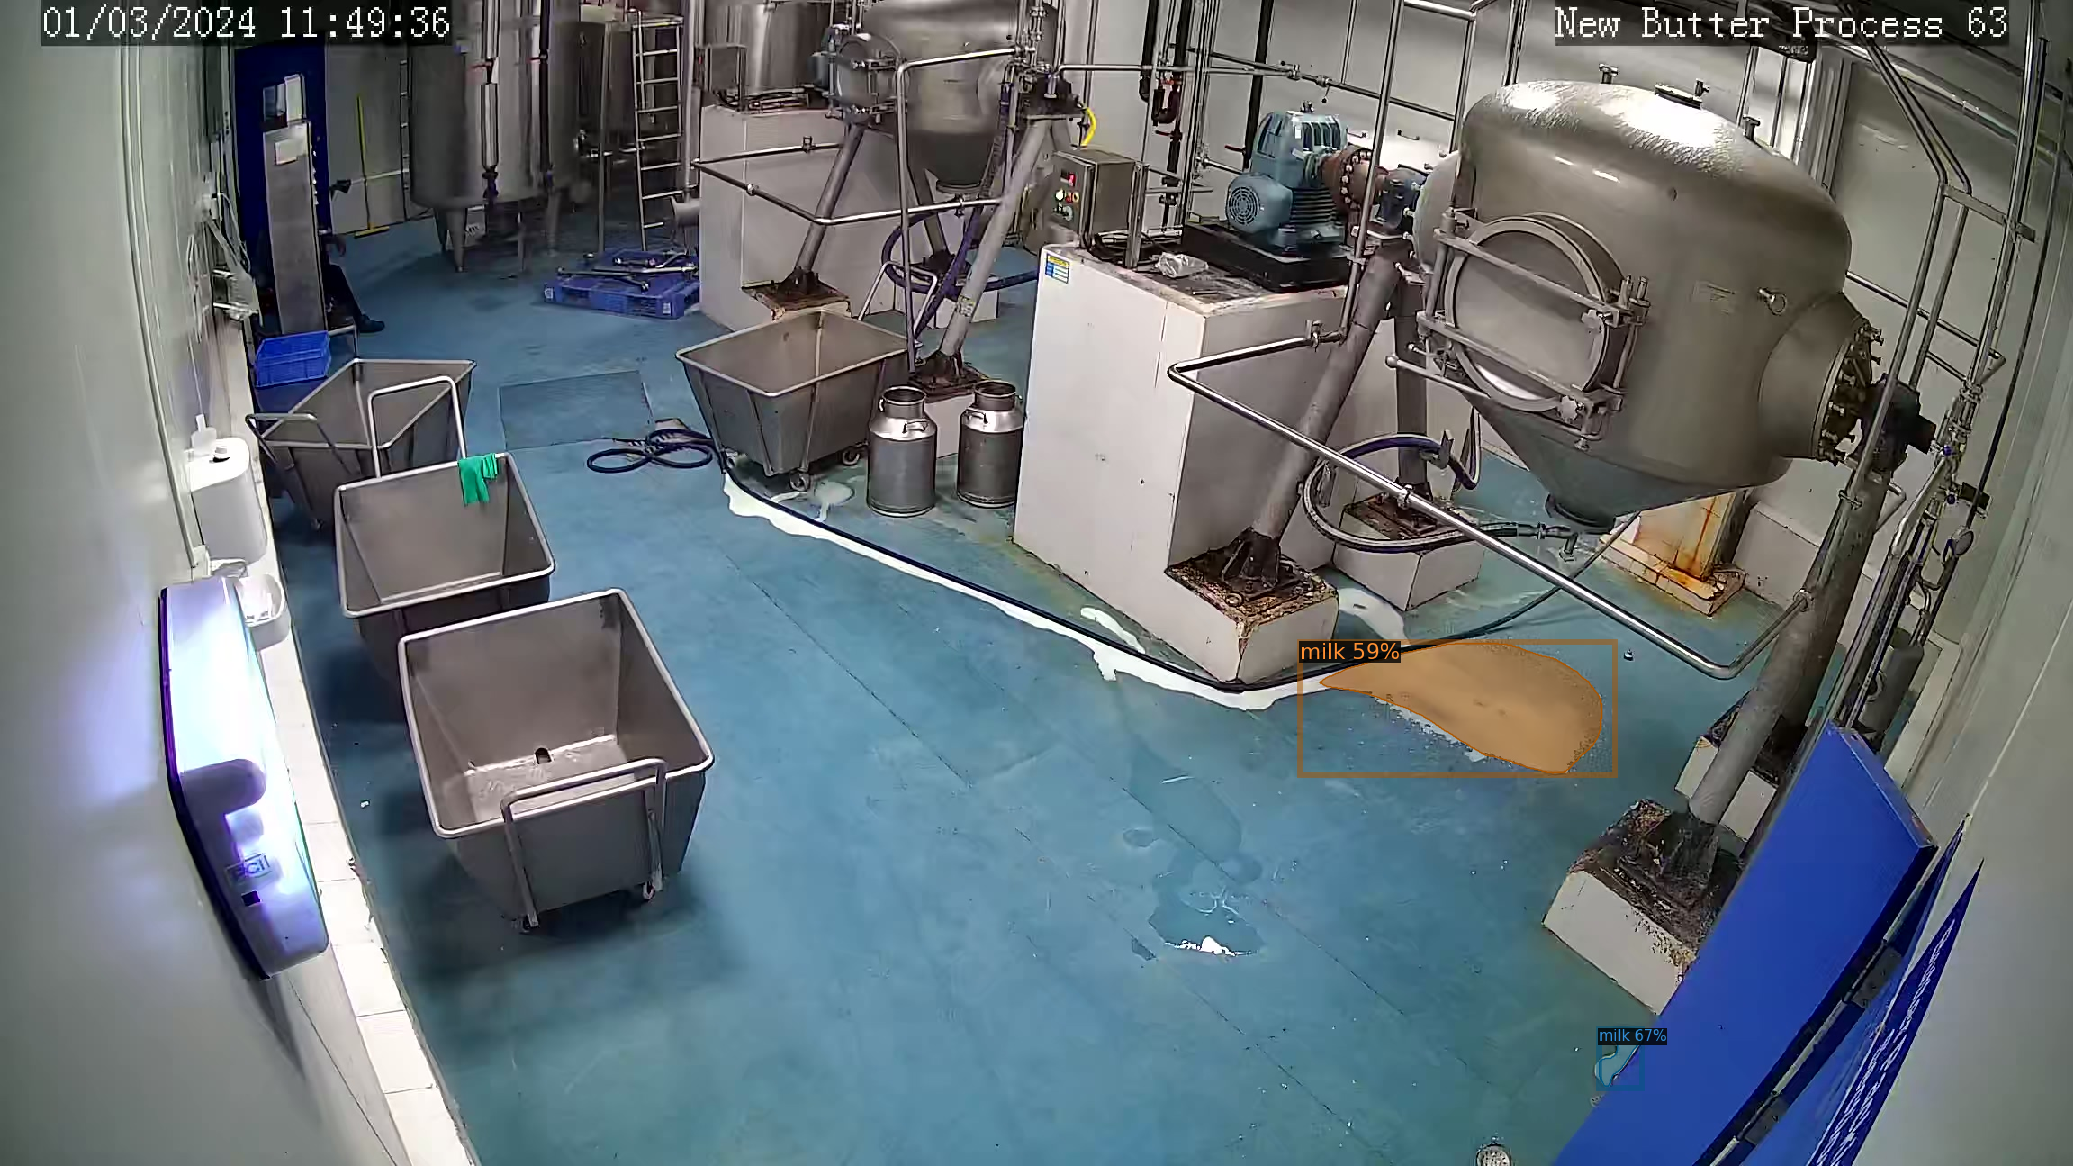

In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/output/model_final.pth")  # Trained model path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for predictions
predictor = DefaultPredictor(cfg)

# Load and test an image
image_path = "/content/New_Butter_Process_63_02_03_2024_ (7).jpg"  # Change to your test image path
img = cv2.imread(image_path)

# Run prediction
outputs = predictor(img)
print(outputs["instances"])


# Visualize results
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.9, instance_mode=ColorMode.IMAGE)
vis = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(vis.get_image()[:, :, ::-1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/output/model_final.pth")  # Trained model path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for predictions
predictor = DefaultPredictor(cfg)

# Load and test an image
image_path = "/content/New_Butter_Process_63_02_03_2024_ (7).jpg"  # Change to your test image path
img = cv2.imread(image_path)

# Run prediction
outputs = predictor(img)
print(outputs["instances"])


# Visualize results
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.9, instance_mode=ColorMode.IMAGE)
vis = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2_imshow(vis.get_image()[:, :, ::-1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [14]:
from google.colab import files
files.download('/content/output/model_final.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
cfg.MODEL.WEIGHTS = '/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.DATASETS.TEST = ("milk", )
predictor = DefaultPredictor(cfg)

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (2, 1024) in the checkpoint but (81, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (2,) in the checkpoint but (81,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (4, 1024) in the checkpoint but (320, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (4,) in the checkpoint but (320,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (1, 256, 1, 1) in the checkpoint but (80, 256, 1, 1) in

In [ ]:
import os
import cv2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# === Configuration ===
cfg = get_cfg()
# cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
from detectron2 import model_zoo
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# cfg.OUTPUT_DIR = "./output"
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = '/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # change to your number of classes
cfg.DATASETS.TEST = ("video_dataset",)
MetadataCatalog.get("video_dataset").thing_classes = ["milk"]  # change accordingly

predictor = DefaultPredictor(cfg)

# === Video Input & Output Paths ===
video_input_path = "/home/hepl/Downloads/rand_milk_spill.mp4"  # ← CHANGE THIS
video_output_path = "output_video.mp4"

cap = cv2.VideoCapture(video_input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# === Setup VideoWriter ===
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(video_output_path, fourcc, fps, (width, height))

print("🔄 Processing video...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Inference
    outputs = predictor(frame)

    # Visualization
    v = Visualizer(frame[:, :, ::-1], metadata=MetadataCatalog.get("video_dataset"), scale=1.0)
    out_frame = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    result = out_frame.get_image()[:, :, ::-1]

    # Write frame to output video
    out.write(result)

# === Cleanup ===
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"✅ Inference on video complete. Output saved to: {video_output_path}")


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
import os
import cv2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer

# === Function: Setup Model ===
def setup_model():
    cfg = get_cfg()
    cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    cfg.OUTPUT_DIR = "./output"
    cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # <- change this based on your dataset
    cfg.DATASETS.TEST = ("video_dataset",)
    MetadataCatalog.get("video_dataset").thing_classes = ["your_class_name"]  # <- update this
    return DefaultPredictor(cfg)

# === Function: Process Video ===
def process_video(video_path, output_path, predictor):
    cap = cv2.VideoCapture(video_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    print("📽️ Running inference on video...")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        outputs = predictor(frame)
        v = Visualizer(frame[:, :, ::-1], metadata=MetadataCatalog.get("video_dataset"), scale=1.0)
        result = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()[:, :, ::-1]

        writer.write(result)

    cap.release()
    writer.release()
    print(f"✅ Done! Saved output to {output_path}")

# === Main Execution ===
if __name__ == "__main__":
    predictor = setup_model()
    input_video = "/home/hepl/Downloads/rand_milk_spill.mp4"       # <- change this
    output_video = "segmented_output.mp4"        # <- desired output
    process_video(input_video, output_video, predictor)


In [2]:
import os
import cv2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

# === Configuration ===
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Set path to your trained model weights
# cfg.MODEL.WEIGHTS = '/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth'
cfg.MODEL.WEIGHTS = "download_models/spillage_model.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Adjust to your number of classes

# Force CPU usage (important if no GPU or NVIDIA drivers)
cfg.MODEL.DEVICE = "cpu"

# Register dataset metadata
cfg.DATASETS.TEST = ("video_dataset",)
MetadataCatalog.get("video_dataset").thing_classes = ["milk"]

# Create predictor
predictor = DefaultPredictor(cfg)

# === Video Input & Output Paths ===
video_input_path = "/home/hepl/Downloads/EZStation 3.0             2025-06-25 15-01-54.mp4"
video_output_path = "output_video_2.mp4"

# === Video Reader and Writer ===
cap = cv2.VideoCapture(video_input_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(video_output_path, fourcc, fps, (width, height))

print("🔄 Processing video...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference
    outputs = predictor(frame)

    # Visualize predictions
    v = Visualizer(frame[:, :, ::-1], metadata=MetadataCatalog.get("video_dataset"), scale=1.0)
    out_frame = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    result = out_frame.get_image()[:, :, ::-1]

    # Write to output video
    out.write(result)

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"✅ Inference complete. Output saved to: {video_output_path}")


🔄 Processing video...
✅ Inference complete. Output saved to: output_video_2.mp4


Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
The checkpoint state_dict contains 

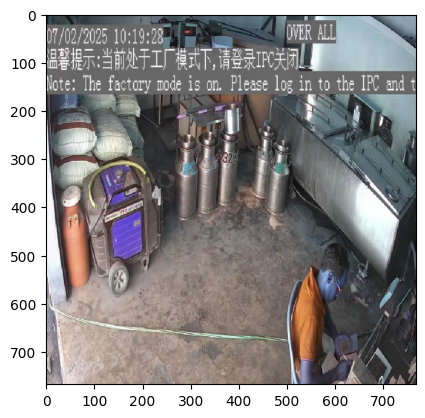

In [13]:

import cv2
import torch
from detectron2 import config
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo
import matplotlib.pyplot as plt

# Load the configuration file for the model
cfg = config.get_cfg()

# Replace with the path to your trained model
cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"

# Set up the configuration for the model (replace with the correct configuration file)
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
# cfg.merge_from_file("path_to_config_file/config.yaml")

# Make sure to set the model to inference mode
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # You can adjust the threshold
cfg.MODEL.DEVICE = "cpu"  # Change to "cuda" if you're using a GPU

# Create the predictor
predictor = DefaultPredictor(cfg)

# Load your unseen image (replace with the path to the unseen image)
image_path = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/Dataset/train/images/20250327172107896-1-2_jpg.rf.ae24c6eb783521f742c4c2bafd4ab725.jpg"
image = cv2.imread(image_path)

# Perform inference on the image
outputs = predictor(image)

# Visualize the results
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TEST[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Show the image with the instance segmentation predictions
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()



In [14]:
import cv2
import torch
from detectron2 import config
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo
import matplotlib.pyplot as plt

# Load the configuration file for the model
cfg = config.get_cfg()

# Replace with the path to your trained model
cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"

# Set up the configuration for the model (use model from the model zoo if needed)
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# Make sure to set the model to inference mode
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Confidence threshold for detection (you can adjust this)
cfg.MODEL.DEVICE = "cpu"  # Change to "cuda" if you're using a GPU

# Create the predictor
predictor = DefaultPredictor(cfg)

# Load your unseen image (replace with the path to the unseen image)
image_path = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/Dataset/train/images/20250327172107896-1-2_jpg.rf.ae24c6eb783521f742c4c2bafd4ab725.jpg"
image = cv2.imread(image_path)

# Perform inference on the image
outputs = predictor(image)

# Access the metadata and ensure the correct class for 'milk' (or the class you want to detect)
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])  # Ensure this matches your dataset

# Make sure the class names reflect your dataset's classes
metadata.thing_classes = ['milk']  # Replace this with the actual class names (if multiple, list them all)

# Visualize the results with correct class names
v = Visualizer(image[:, :, ::-1], metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Show the image with the instance segmentation predictions
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()


Some model parameters or buffers are not found in the checkpoint:
backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
The checkpoint state_dict contains 

AssertionError: Attribute 'thing_classes' in the metadata of 'coco_2017_train' cannot be set to a different value!
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'] != ['milk']

In [ ]:
from detectron2.model_zoo import get_config_file
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu" 


cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set threshold for predictions
predictor = DefaultPredictor(cfg)

# Load and test an image
image_path = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/Dataset/train/images/20250326034718884-4-_jpg.rf.b5e513c840d1a7e80fc7e41f248edd98.jpg"  # Change to your test image path
img = cv2.imread(image_path)

# Run prediction
outputs = predictor(img)
print(outputs["instances"])


# Visualize results
visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.9, instance_mode=ColorMode.IMAGE)
vis = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))

cv2.imshow("img",vis.get_image()[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import os
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog

# Predictor setup
cfg.MODEL.WEIGHTS = 'download_models/spillage_model.pth'
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "/content/output/model_final.pth") 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.FPN.IN_FEATURES = ["res4"]  # or choose valid layers for your backbone

predictor = DefaultPredictor(cfg)

# Metadata setup
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])  # Adjust if needed

# Input video
video_path = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/NC_21/pouring_clip/pouring_1.mp4"
cap = cv2.VideoCapture(video_path)

# Output folder to save frames
output_dir = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/Dataset/train/images/milk_detected_frames"
os.makedirs(output_dir, exist_ok=True)

frame_count = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    outputs = predictor(frame)
    instances = outputs["instances"].to("cpu")
    classes = instances.pred_classes

    # Check if 'milk' is detected
    detected_classes = [metadata.thing_classes[i] for i in classes]
    if "milk" in detected_classes:
        save_path = os.path.join(output_dir, f"frame_{frame_count:05d}.jpg")
        cv2.imwrite(save_path, frame)
        saved_count += 1

    frame_count += 1

cap.release()
print(f"Done. Saved {saved_count} frames with milk detected.")


In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

# Step 1: Set up config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"

# Set metadata (same as used during training)
metadata = MetadataCatalog.get("train")

# Initialize predictor
predictor = DefaultPredictor(cfg)

# Step 2: Open video file
video_path = "/path/to/your/video.mp4"
cap = cv2.VideoCapture(video_path)

# Optionally: Save the output video

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))


# Step 3: Process video frame by frame
while cap.isOpened():
    cap = cv2.VideoCapture()

    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR to RGB for visualizer
    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Inference
    outputs = predictor(frame)

    # Visualize
    visualizer = Visualizer(img_rgb, metadata=metadata, scale=1.0, instance_mode=ColorMode.IMAGE)
    output = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    vis_frame = cv2.cvtColor(output.get_image(), cv2.COLOR_RGB2BGR)

    # Show frame (optional)
    cv2.imshow("Detection", vis_frame)

    # Save frame to output video
    out.write(vis_frame)

    # Press "q" to quit early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 4: Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()


Instances(num_instances=7, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[130.9397, 462.8183, 212.5526, 540.0207],
        [364.5478, 287.4123, 499.1575, 585.2809],
        [222.8414, 450.1908, 256.8459, 507.7475],
        [280.8475, 504.0378, 302.9480, 568.7946],
        [244.4009, 498.1780, 262.7614, 558.5398],
        [324.9005, 488.2629, 358.8130, 583.4446],
        [170.5460, 407.7049, 217.8934, 454.5913]])), scores: tensor([0.9893, 0.9823, 0.9787, 0.9696, 0.9663, 0.9610, 0.7516]), pred_classes: tensor([0, 0, 0, 0, 0, 0, 0]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],

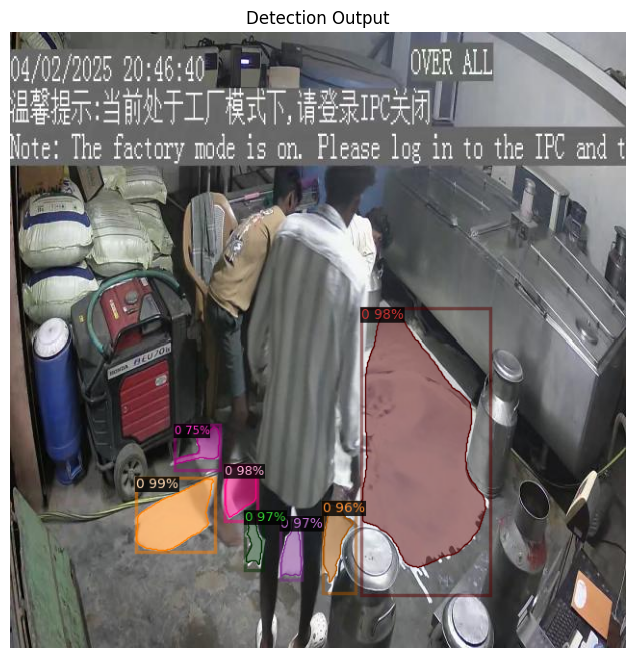

In [28]:
import cv2
import torch
import matplotlib.pyplot as plt

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.modeling import build_model
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))


# # Step 1: Set up config
# cfg = get_cfg()
# cfg.MODEL.DEVICE = "cpu"  
# metadata = MetadataCatalog.get("my_dataset_train")

# # Use a base model architecture that matches what you trained
# # cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# # Set number of classes (update this to match your dataset)
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # change to your number of classes
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# # Load trained weights
# cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"

# Step 1: Set up config
# cfg = get_cfg()
# cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # MAKE SURE THIS MATCHES YOUR TRAINED MODEL


cfg.MODEL.DEVICE = "cpu"  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/download_models/spillage_model.pth"
metadata = MetadataCatalog.get("train")


# Build predictor
predictor = DefaultPredictor(cfg)

# Step 2: Load image
image_path = "/home/hepl/Desktop/New_Folder/Keerthanaa/Keerthii/MAR_2025/VA_research_task/NCS/spillage_detection/Dataset/train/images/20250327172107896-5-_jpg.rf.c554ab645323c3153461b11d449424c9.jpg"
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 3: Inference
outputs = predictor(img)
print(outputs["instances"])

# Step 4: Visualize
visualizer = Visualizer(img_rgb, metadata=metadata, scale=1.0, instance_mode=ColorMode.IMAGE)
output = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(output.get_image())
plt.axis("off")
plt.title("Detection Output")
plt.show()


In [19]:
###

In [ ]:
# import os
# import cv2
# import numpy as np
# import torch
# import json
# from detectron2.config import get_cfg
# from detectron2.engine import DefaultPredictor
# from detectron2.utils.visualizer import Visualizer
# from detectron2.data import MetadataCatalog

# def setup_cfg(config_file_path, weights_path, threshold=0.5):
#     """
#     Create a detectron2 config and a predictor using the specified weights.
    
#     Args:
#         config_file_path (str): Path to the config file.
#         weights_path (str): Path to the model weights.
#         threshold (float): Detection confidence threshold.
    
#     Returns:
#         detectron2 CfgNode: The created config.
#     """
#     cfg = get_cfg()
#     # If you used a standard Detectron2 config file during training,
#     # uncomment and update the line below with the path to that config
#     # cfg.merge_from_file(config_file_path)
    
#     # If you have a custom dataset
#     try:
#         with open('metrics.json', 'r') as f:
#             metrics = json.load(f)
#             # Try to extract num_classes if available
#             if 'num_classes' in metrics:
#                 num_classes = metrics['num_classes']
#             else:
#                 # Default to a reasonable number if not found
#                 num_classes = 80  # Default for COCO
#     except:
#         # If metrics.json doesn't contain this info, set a default
#         num_classes = 80
    
#     # Update the config with the saved model weights
#     cfg.MODEL.WEIGHTS = weights_path
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold  # Set testing threshold
#     cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    
#     return cfg

# def get_predictor(cfg):
#     """
#     Create a predictor from the config.
    
#     Args:
#         cfg (detectron2 CfgNode): Config.
    
#     Returns:
#         DefaultPredictor: The predictor object.
#     """
#     return DefaultPredictor(cfg)

# def run_inference(predictor, image_path, output_dir="output"):
#     """
#     Run inference on an image and save the visualization.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         image_path (str): Path to the input image.
#         output_dir (str): Directory to save output visualizations.
    
#     Returns:
#         dict: The prediction outputs including instances with masks, boxes, etc.
#     """
#     # Read the image
#     img = cv2.imread(image_path)
#     if img is None:
#         print(f"Could not read image: {image_path}")
#         return None
    
#     # Run inference
#     outputs = predictor(img)
    
#     # Get the output directory ready
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Visualize the predictions
#     v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
#     instances = outputs["instances"].to("cpu")
#     viz = v.draw_instance_predictions(instances)
    
#     # Save visualization
#     output_path = os.path.join(output_dir, os.path.basename(image_path))
#     cv2.imwrite(output_path, viz.get_image()[:, :, ::-1])
    
#     print(f"Saved inference visualization to {output_path}")
    
#     # Print some info about the predictions
#     print(f"Detected {len(instances)} instances")
#     if len(instances) > 0:
#         print(f"Prediction classes: {instances.pred_classes}")
#         print(f"Prediction scores: {instances.scores}")
    
#     return outputs

# def process_images_in_directory(predictor, input_dir, output_dir="output"):
#     """
#     Process all images in a directory.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         input_dir (str): Directory containing input images.
#         output_dir (str): Directory to save output visualizations.
#     """
#     image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    
#     for filename in os.listdir(input_dir):
#         if any(filename.lower().endswith(ext) for ext in image_extensions):
#             image_path = os.path.join(input_dir, filename)
#             print(f"Processing {image_path}")
#             run_inference(predictor, image_path, output_dir)

# if __name__ == "__main__":
#     # Path to your saved model weights
#     weights_path = "download_models/spillage_model.pth"  # Update this to your .pth file path
    
#     # If your model was trained with a specific config file, specify it here
#     config_file_path = None  # Update if needed
    
#     # Directory containing images to process
#     input_dir = "Dataset/train/images/20250326034718884-8-_jpg.rf.8db2541c6deeb09f8318d17de0dd4eb6.jpg"  # Update this to your input directory
    
#     # Output directory
#     output_dir = "output_images"
    
#     # Set up the config
#     cfg = setup_cfg(config_file_path, weights_path, threshold=0.5)
    
#     # Create the predictor
#     predictor = get_predictor(cfg)
    
#     # Process all images in the input directory
#     # process_images_in_directory(predictor, input_dir, output_dir)
    
#     # Alternatively, process a single image
#     single_image_path = "path/to/your/image.jpg"
#     run_inference(predictor, single_image_path, output_dir)

Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible s

NotADirectoryError: [Errno 20] Not a directory: 'Dataset/train/images/20250326034718884-8-_jpg.rf.8db2541c6deeb09f8318d17de0dd4eb6.jpg'

In [ ]:
# import os
# import cv2
# import numpy as np
# import torch
# import json
# from detectron2.config import get_cfg
# from detectron2.engine import DefaultPredictor
# from detectron2.utils.visualizer import Visualizer
# from detectron2.data import MetadataCatalog

# def setup_cfg(config_file_path, weights_path, threshold=0.5):
#     """
#     Create a detectron2 config and a predictor using the specified weights.
    
#     Args:
#         config_file_path (str): Path to the config file.
#         weights_path (str): Path to the model weights.
#         threshold (float): Detection confidence threshold.
    
#     Returns:
#         detectron2 CfgNode: The created config.
#     """
#     cfg = get_cfg()
#     # If you used a standard Detectron2 config file during training,
#     # uncomment and update the line below with the path to that config
#     # cfg.merge_from_file(config_file_path)
    
#     # If you have a custom dataset
#     try:
#         with open('metrics.json', 'r') as f:
#             metrics = json.load(f)
#             # Try to extract num_classes if available
#             if 'num_classes' in metrics:
#                 num_classes = metrics['num_classes']
#             else:
#                 # Default to a reasonable number if not found
#                 num_classes = 1  # Default for COCO
#     except:
#         # If metrics.json doesn't contain this info, set a default
#         num_classes = 1
    
#     # Update the config with the saved model weights
#     cfg.MODEL.WEIGHTS = weights_path
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold  # Set testing threshold
#     cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    
#     return cfg

# def get_predictor(cfg):
#     """
#     Create a predictor from the config.
    
#     Args:
#         cfg (detectron2 CfgNode): Config.
    
#     Returns:
#         DefaultPredictor: The predictor object.
#     """
#     return DefaultPredictor(cfg)

# def run_inference(predictor, image_path, output_dir="output"):
#     """
#     Run inference on an image and save the visualization.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         image_path (str): Path to the input image.
#         output_dir (str): Directory to save output visualizations.
    
#     Returns:
#         dict: The prediction outputs including instances with masks, boxes, etc.
#     """
#     # Read the image
#     img = cv2.imread(image_path)
#     if img is None:
#         print(f"Could not read image: {image_path}")
#         return None
    
#     # Run inference
#     outputs = predictor(img)
    
#     # Get the output directory ready
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Visualize the predictions
#     v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
#     instances = outputs["instances"].to("cpu")
#     viz = v.draw_instance_predictions(instances)
    
#     # Save visualization
#     output_path = os.path.join(output_dir, os.path.basename(image_path))
#     cv2.imwrite(output_path, viz.get_image()[:, :, ::-1])
    
#     print(f"Saved inference visualization to {output_path}")
    
#     # Print some info about the predictions
#     print(f"Detected {len(instances)} instances")
#     if len(instances) > 0:
#         print(f"Prediction classes: {instances.pred_classes}")
#         print(f"Prediction scores: {instances.scores}")
    
#     return outputs

# def process_images_in_directory(predictor, input_dir, output_dir="output"):
#     """
#     Process all images in a directory.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         input_dir (str): Directory containing input images.
#         output_dir (str): Directory to save output visualizations.
#     """
#     image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    
#     for filename in os.listdir(input_dir):
#         if any(filename.lower().endswith(ext) for ext in image_extensions):
#             image_path = os.path.join(input_dir, filename)
#             print(f"Processing {image_path}")
#             run_inference(predictor, image_path, output_dir)

# if __name__ == "__main__":
#     # Path to your saved model weights
#     weights_path = "download_models/spillage_model.pth"
    
#     # If your model was trained with a specific config file, specify it here
#     config_file_path = None
    
#     # Set up the config
#     cfg = setup_cfg(config_file_path, weights_path, threshold=0.5)
    
#     # Create the predictor
#     predictor = get_predictor(cfg)
    
#     # Process a single image
#     single_image_path = "Dataset/train/images/20250326034718884-8-_jpg.rf.8db2541c6deeb09f8318d17de0dd4eb6.jpg"
#     output_dir = "output_images"
#     run_inference(predictor, single_image_path, output_dir)
    
#     # If you want to process all images in a directory, uncomment these lines and set the right path
#     # input_dir = "Dataset/train/images"  # Update this to your input directory
#     # process_images_in_directory(predictor, input_dir, output_dir)

Skip loading parameter 'proposal_generator.rpn_head.conv.weight' to the model due to incompatible shapes: (256, 256, 3, 3) in the checkpoint but (1024, 1024, 3, 3) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.conv.bias' to the model due to incompatible shapes: (256,) in the checkpoint but (1024,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.weight' to the model due to incompatible shapes: (3, 256, 1, 1) in the checkpoint but (15, 1024, 1, 1) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.objectness_logits.bias' to the model due to incompatible shapes: (3,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'proposal_generator.rpn_head.anchor_deltas.weight' to the model due to incompatible s

IndexError: tuple index out of range

In [ ]:
# import os
# import cv2
# import numpy as np
# import torch
# import json
# from detectron2.config import get_cfg
# from detectron2.engine import DefaultPredictor
# from detectron2.utils.visualizer import Visualizer
# from detectron2.data import MetadataCatalog, DatasetCatalog

# def setup_cfg(config_file_path, weights_path, threshold=0.5):
#     """
#     Create a detectron2 config and a predictor using the specified weights.
    
#     Args:
#         config_file_path (str): Path to the config file.
#         weights_path (str): Path to the model weights.
#         threshold (float): Detection confidence threshold.
    
#     Returns:
#         detectron2 CfgNode: The created config.
#     """
#     cfg = get_cfg()
    
#     # Try to load from a default config file if provided
#     if config_file_path and os.path.exists(config_file_path):
#         cfg.merge_from_file(config_file_path)
    
#     # Try to determine number of classes from metrics.json
#     try:
#         with open('metrics.json', 'r') as f:
#             metrics = json.load(f)
#             # Try to extract num_classes if available
#             if 'num_classes' in metrics:
#                 num_classes = metrics['num_classes']
#             else:
#                 # Default to a reasonable number if not found
#                 num_classes = 2  # Default for binary classification (adjust if needed)
#     except:
#         # If metrics.json doesn't contain this info, set a default
#         num_classes = 2  # Default to binary classification
    
#     # Set model settings
#     cfg.MODEL.WEIGHTS = weights_path
#     cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold  # Set threshold for this model
#     cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    
#     # Make sure we have a dataset defined for visualization
#     if not cfg.DATASETS.TRAIN:
#         # Register a dummy dataset if none exists
#         dataset_name = "spillage_dataset"
#         cfg.DATASETS.TRAIN = (dataset_name,)
        
#         # Register metadata for this dataset
#         if dataset_name not in MetadataCatalog.list():
#             MetadataCatalog.get(dataset_name).set(thing_classes=["background", "spillage"])
#             DatasetCatalog.register(dataset_name, lambda: [])
    
#     return cfg

# def get_predictor(cfg):
#     """
#     Create a predictor from the config.
    
#     Args:
#         cfg (detectron2 CfgNode): Config.
    
#     Returns:
#         DefaultPredictor: The predictor object.
#     """
#     return DefaultPredictor(cfg)

# def run_inference(predictor, image_path, output_dir="output", cfg=None):
#     """
#     Run inference on an image and save the visualization.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         image_path (str): Path to the input image.
#         output_dir (str): Directory to save output visualizations.
#         cfg (CfgNode): Configuration to get dataset metadata from.
    
#     Returns:
#         dict: The prediction outputs including instances with masks, boxes, etc.
#     """
#     # Read the image
#     img = cv2.imread(image_path)
#     if img is None:
#         print(f"Could not read image: {image_path}")
#         return None
    
#     # Run inference
#     outputs = predictor(img)
    
#     # Get the output directory ready
#     os.makedirs(output_dir, exist_ok=True)
    
#     # Visualize the predictions - safely get metadata
#     dataset_name = cfg.DATASETS.TRAIN[0] if cfg and cfg.DATASETS.TRAIN else None
#     metadata = MetadataCatalog.get(dataset_name) if dataset_name else None
    
#     # Create visualizer with or without metadata
#     v = Visualizer(img[:, :, ::-1], metadata=metadata)
#     instances = outputs["instances"].to("cpu")
#     viz = v.draw_instance_predictions(instances)
    
#     # Save visualization
#     output_path = os.path.join(output_dir, os.path.basename(image_path))
#     cv2.imwrite(output_path, viz.get_image()[:, :, ::-1])
    
#     print(f"Saved inference visualization to {output_path}")
    
#     # Print some info about the predictions
#     print(f"Detected {len(instances)} instances")
#     if len(instances) > 0:
#         print(f"Prediction classes: {instances.pred_classes}")
#         print(f"Prediction scores: {instances.scores}")
    
#     return outputs

# def process_images_in_directory(predictor, input_dir, output_dir="output", cfg=None):
#     """
#     Process all images in a directory.
    
#     Args:
#         predictor (DefaultPredictor): The predictor to use.
#         input_dir (str): Directory containing input images.
#         output_dir (str): Directory to save output visualizations.
#         cfg (CfgNode): Configuration to get dataset metadata from.
#     """
#     image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    
#     if not os.path.isdir(input_dir):
#         print(f"Error: {input_dir} is not a directory")
#         return
    
#     for filename in os.listdir(input_dir):
#         if any(filename.lower().endswith(ext) for ext in image_extensions):
#             image_path = os.path.join(input_dir, filename)
#             print(f"Processing {image_path}")
#             run_inference(predictor, image_path, output_dir, cfg)

# if __name__ == "__main__":
#     # Path to your saved model weights
#     weights_path = "download_models/spillage_model.pth"
    
#     # If your model was trained with a specific config file, specify it here
#     config_file_path = None
    
#     # Set up the config
#     cfg = setup_cfg(config_file_path, weights_path, threshold=0.5)
    
#     # Create the predictor
#     predictor = get_predictor(cfg)
    
#     # Process a single image
#     single_image_path = "Dataset/train/images/20250326034718884-8-_jpg.rf.8db2541c6deeb09f8318d17de0dd4eb6.jpg"
#     output_dir = "output_images"
    
#     # Check if the image exists
#     if os.path.exists(single_image_path):
#         run_inference(predictor, single_image_path, output_dir, cfg)
#     else:
#         print(f"Error: Image not found at {single_image_path}")
#         # If the image is not found, it might be that the path is a directory instead
#         if os.path.isdir(single_image_path):
#             print(f"Detected that {single_image_path} is a directory. Processing all images in it.")
#             process_images_in_directory(predictor, single_image_path, output_dir, cfg)
#         else:
#             print("Please check the image path and try again.")
    
#     # Uncomment to process all images in a directory
#     # input_dir = "Dataset/train/images"
#     # process_images_in_directory(predictor, input_dir, output_dir, cfg)